In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
cores = {
    "verde": (0, 255, 0),
    "vermelho": (0, 0, 255),
    "azul": (255, 0, 0),
    "preto": (0, 0, 0),
    "branco": (255, 255, 255),
    "amarelo": (0, 234, 255),
    "rosa": (255, 0, 255),
    "laranja": (0, 140, 255),
    "roxo": (255, 0, 140),
    "azul_claro": (255, 140, 0),
}

In [3]:
configs = \
{
    "largura": 1000,
    "altura": 200,
    "num_pontos": 100,
    "T": 3,
    "fps_video": 60,
    "cor_circulo": "preto",
    "cor_fundo": "branco",
    "cor_linha": "verde",
    "cor_ponto": "vermelho",
}

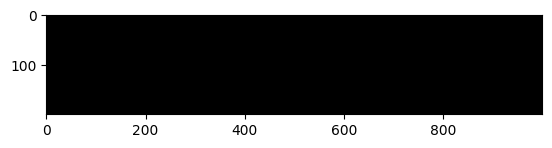

In [4]:
# criando um array 3D de zeros (preto) para representar a tela colorida
tela = np.zeros(shape=(configs["altura"], configs["largura"], 3), 
                dtype=np.uint8)
plt.imshow(tela)
plt.show()

In [5]:
# checando os pixels da tela
print(tela[0, 0])
print(tela.mean())

[0 0 0]
0.0


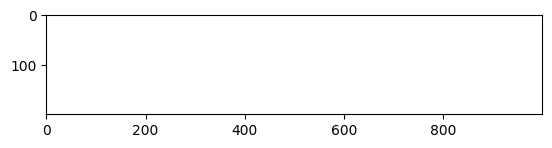

In [6]:
# trocando a cor do fundo da tela (branco)
tela[:, :] = cores[configs["cor_fundo"]]
plt.imshow(tela)
plt.show()

In [7]:
# checando os pixels da tela
print(tela[0, 0])
print(tela.mean())

[255 255 255]
255.0


In [8]:
# 210 linhas e 1000 colunas
tela.shape

(200, 1000, 3)

In [9]:
# mostrando a quantidade de pixels da altura da tela
configs["altura"]

200

In [10]:
# mostrando a quantidade de pixels da largura da tela
configs["largura"]

1000

In [11]:
# configurar uma circunferencia que vai ser desenhada no meio da tela
circunferencia = \
{"centro": (configs["largura"] // 2, configs["altura"] // 2), 
 "r": configs["altura"] // 2}

circunferencia

{'centro': (500, 100), 'r': 100}

In [12]:
# lá em baixo vai simplificar a vida fazer essas simplificações
x0, y0, r = \
circunferencia["centro"][0], circunferencia["centro"][1], circunferencia["r"]

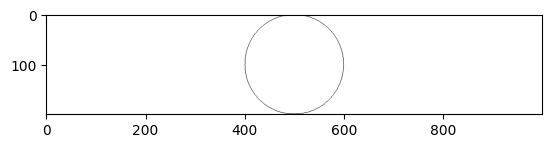

In [13]:
tela = cv2.circle(img=tela, 
                  center=circunferencia["centro"], 
                  radius=circunferencia["r"], 
                  color=cores[configs["cor_circulo"]], 
                  thickness=1)
plt.imshow(tela)
plt.show()

In [14]:
# criando o objeto para representar o ponto um (base da circunferencia)
ponto_um = (configs["largura"] // 2, configs["altura"])
ponto_um

(500, 200)

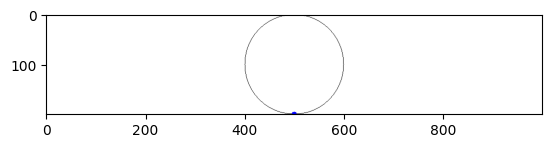

In [15]:
# plotando o ponto_um na tela e mostrando a tela
tela = cv2.circle(img=tela, 
                  center=ponto_um, 
                  radius=5, 
                  color=(0, 0, 255),
                  thickness=-1)
plt.imshow(tela)
plt.show()

In [16]:
# criando o objeto para representar o ponto dois (topo esquerdo da tela)
ponto_dois = (0, 0)

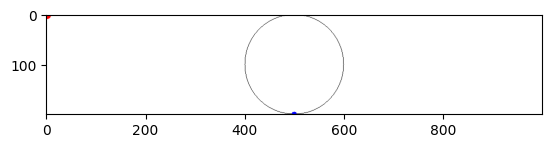

In [17]:
# plotando o ponto_dois na tela e mostrando a tela
tela = cv2.circle(img=tela, 
                  center=ponto_dois, 
                  radius=10, 
                  color=(255, 0, 0),
                  thickness=-1)
plt.imshow(tela)
plt.show()

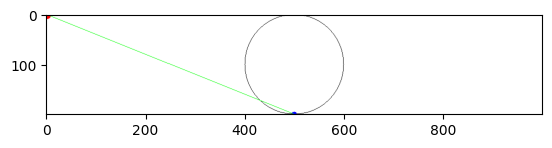

In [18]:
# plota a linha entre os dois pontos na tela e mostra a tela
tela = cv2.line(img=tela, 
                pt1=ponto_um, 
                pt2=ponto_dois, 
                color=cores[configs["cor_linha"]],
                thickness=1)
plt.imshow(tela)
plt.show()

### Encontrar o ponto de ``interseccção`` entre a reta e a circunferencia

In [19]:
# informações da reta
ponto_um, ponto_dois

((500, 200), (0, 0))

In [20]:
# informações da circunferencia
circunferencia

{'centro': (500, 100), 'r': 100}

### Perceber que as informações da reta precisam ser ``convertida``s para as informações necessárias para construir uma equação da reta. Ou seja, ponto_um e ponto_dois precisam ser convertidos em `a` e `b`

In [21]:
a = (ponto_um[1] - ponto_dois[1]) / (ponto_um[0] - ponto_dois[0])
a

0.4

In [22]:
b = ponto_um[1] - a * ponto_um[0]
b

0.0

### Com os dados da reta e os dados da circunferência, é possível encontrar os pontos de ``intersecção`` entre a reta e a circunferência.

In [23]:
a, b

(0.4, 0.0)

In [24]:
circunferencia

{'centro': (500, 100), 'r': 100}

In [25]:
coef_a = a ** 2 + 1
coef_b = 2 * a * b - 2 * a * y0 - 2 * x0
coef_c = b ** 2 + y0 ** 2 - 2 * b * y0 - r ** 2 + x0 ** 2

coef_a, coef_b, coef_c

(1.1600000000000001, -1080.0, 250000.0)

In [26]:
x1 = (-coef_b + np.sqrt(coef_b ** 2 - 4 * coef_a * coef_c)) / (2 * coef_a)
y1 = a * x1 + b
sol1 = (x1, y1)
sol1

(499.9999999999994, 199.99999999999977)

### Perceber que o ponto ``acima`` é o próprio ``ponto_um``, portanto, **NÃO** é a solução

In [27]:
x2 = (-coef_b - np.sqrt(coef_b ** 2 - 4 * coef_a * coef_c)) / (2 * coef_a)
y2 = a * x2 + b
sol2 = (x2, y2)
sol2

(431.03448275862127, 172.4137931034485)

### Perceber que o ponto ``acima`` é diferente do ``ponto_um``, portanto, **é** a solução

In [28]:
# convertendo a solução_um para inteiros (não existem posições não inteiras em arrays)
# a função round arredonda o número para o inteiro mais próximo
# e a 'função' int converte o número para inteiro
sol1 = (int(round(sol1[0], 0)), int(round(sol1[1], 0)))
sol1

(500, 200)

In [29]:
# convertendo a solução_dois para inteiros (não existem posições não inteiras em arrays)
# a função round arredonda o número para o inteiro mais próximo
# e a 'função' int converte o número para inteiro
sol2 = (int(round(sol2[0], 0)), int(round(sol2[1], 0)))
sol2

(431, 172)

In [30]:
def distancia(ponto_um: list | tuple, ponto_dois: list | tuple) -> float:
    """
    Calcula a distância entre dois pontos no plano cartesiano.

    Args:
    ponto_um (list | tuple): As coordenadas do ponto um.
    ponto_dois (list | tuple): As coordenadas do ponto dois.

    Returns:
    float: A distância entre os dois pontos.
    """

    return np.sqrt((ponto_um[0] - ponto_dois[0]) ** 2 + \
                   (ponto_um[1] - ponto_dois[1]) ** 2)

In [31]:
solucoes = [sol1, sol2]
solucoes

[(500, 200), (431, 172)]

In [32]:
# regras de comparação entre tuplas/listas
print((500, 200) > (431, 172))   # comparou as primeiras posições para retornar True
print((430, 200) > (431, 172))   # comparou as primeiras posições para retornar False
print((431, 200) > (431, 172))   # comparou as segundas posições para retornar True
print((431, 171) > (431, 172))   # comparou as segundas posições para retornar False
print((431, 172) > (431, 172))   # comparou as primeiras e segundas posições para retornar False
print((431, 172, 0) > (431, 172))# comparou as primeiras e segundas posições e o tamanho da primeira tupla para retornar True

True
False
True
False
False
True


In [33]:
# retornou (500, 200) pois 500 > 431. Porém, a regra de comparação deve ser diferente para cumprir o
# propósito da aplicação...
max(solucoes)

(500, 200)

In [34]:
# a função 'max' é capaz de retornar o maior valor de um iterável através de uma regra especifica
# a regra abaixo é a função que calcula distancia para cada um dos pontos da lista de soluções
# a função 'max' vai retornar o ponto de maior distância com o ponto_um
solucao = max(solucoes, key=lambda sol: distancia(ponto_um, sol))
solucao

(431, 172)

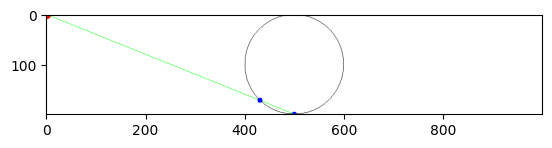

In [35]:
# plotando a solução na tela e mostrando a tela
tela = cv2.circle(img=tela,
                    center=solucao,
                    radius=5,
                    color=cores[configs["cor_ponto"]],
                    thickness=-1)
plt.imshow(tela)
plt.show()

In [36]:
ponto_versiera = (ponto_dois[0], solucao[1])
ponto_versiera

(0, 172)

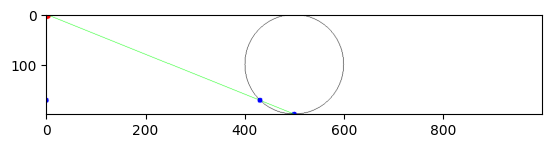

In [37]:
# plotando o ponto_versiera na tela e mostrando a tela
tela = cv2.circle(img=tela,
                    center=ponto_versiera,
                    radius=5,
                    color=cores[configs["cor_ponto"]],
                    thickness=-1)
plt.imshow(tela)
plt.show()

In [38]:
# mostra a quantidade de pontos da versiera a serem plotados
configs["num_pontos"]

100

In [39]:
# criando a coleção dos valores 'y' de cada ponto_dois da versiera
colecao_y_pontos_dois = \
    np.linspace(start=0, 
                stop=configs["largura"], 
                num=configs["num_pontos"]).astype(int)
colecao_y_pontos_dois

array([   0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  101,
        111,  121,  131,  141,  151,  161,  171,  181,  191,  202,  212,
        222,  232,  242,  252,  262,  272,  282,  292,  303,  313,  323,
        333,  343,  353,  363,  373,  383,  393,  404,  414,  424,  434,
        444,  454,  464,  474,  484,  494,  505,  515,  525,  535,  545,
        555,  565,  575,  585,  595,  606,  616,  626,  636,  646,  656,
        666,  676,  686,  696,  707,  717,  727,  737,  747,  757,  767,
        777,  787,  797,  808,  818,  828,  838,  848,  858,  868,  878,
        888,  898,  909,  919,  929,  939,  949,  959,  969,  979,  989,
       1000])

In [44]:
# cores RGB
cores = {
    "verde": (0, 255, 0),
    "vermelho": (255, 0, 0),
    "azul": (0, 0, 255),
    "preto": (0, 0, 0),
    "branco": (255, 255, 255),
    "amarelo": (255, 234, 0),
    "rosa": (255, 0, 255),
    "laranja": (255, 140, 0),
    "roxo": (140, 0, 255),
    "azul_claro": (0, 140, 255),
}

configs = \
{
    "largura": 1000,
    "altura": 200,
    "num_pontos": 200,
    "T": 3,
    "fps_video": 60,
    "cor_circulo": "preto",
    "cor_fundo": "branco",
    "cor_linha": "verde",
    "cor_ponto": "vermelho",
}

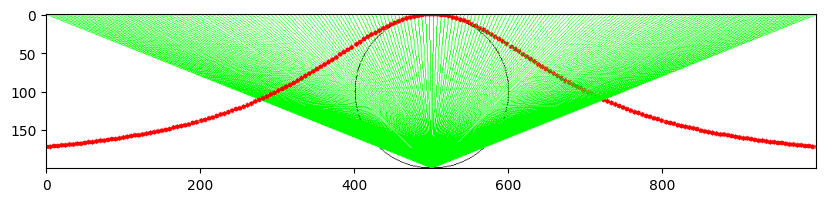

In [45]:
# cria a figura e os eixos
fig, ax = plt.subplots(1, 1, figsize=(10, 2))

# cria um array 3D de zeros (preto) para representar a tela colorida
tela = np.zeros(shape=(configs["altura"], configs["largura"], 3), 
                dtype=np.uint8)

# troca a cor do fundo da tela (branco)
tela[:, :] = cores[configs["cor_fundo"]]

# configurar uma circunferencia que vai ser desenhada no meio da tela
circunferencia = \
{"centro": (configs["largura"] // 2, configs["altura"] // 2), 
 "r": configs["altura"] // 2}
x0, y0, r = \
circunferencia["centro"][0], circunferencia["centro"][1], circunferencia["r"]

# desenha a circunferencia na tela
tela = cv2.circle(img=tela, 
                  center=circunferencia["centro"], 
                  radius=circunferencia["r"], 
                  color=cores[configs["cor_circulo"]], 
                  thickness=1)

# cria o ponto_um (base da circunferencia)
ponto_um = (configs["largura"] // 2, configs["altura"])

# gera a coleção dos valores 'y' de cada ponto_dois da versiera
colecao_y_pontos_dois = \
    np.linspace(start=0, 
                stop=configs["largura"], 
                num=configs["num_pontos"]).astype(int)

# iterando sobre cada 'y' da coleção de pontos_dois
for y_ponto_dois in colecao_y_pontos_dois:

    # cria o ponto_dois (topo esquerdo da tela) para cada iteração
    ponto_dois = (y_ponto_dois, 0)

    # plota a linha entre os dois pontos na tela
    tela = cv2.line(img=tela, 
                pt1=ponto_um, 
                pt2=ponto_dois, 
                color=cores[configs["cor_linha"]],
                thickness=1)

    # calcula a equação da reta entre os dois pontos
    a = (ponto_um[1] - ponto_dois[1]) / (ponto_um[0] - ponto_dois[0])
    b = ponto_um[1] - a * ponto_um[0]

    # encontra os coeficientes da equação de segundo grau que 
    # representa a interseção entre a reta e a circunferencia
    coef_a = a ** 2 + 1
    coef_b = 2 * a * b - 2 * a * y0 - 2 * x0
    coef_c = b ** 2 + y0 ** 2 - 2 * b * y0 - r ** 2 + x0 ** 2

    # encontra a primeira solucao 
    x1 = (-coef_b + np.sqrt(coef_b ** 2 - 4 * coef_a * coef_c)) / (2 * coef_a)
    y1 = a * x1 + b

    # encontra a segunda solucao
    x2 = (-coef_b - np.sqrt(coef_b ** 2 - 4 * coef_a * coef_c)) / (2 * coef_a)
    y2 = a * x2 + b

    # arredonda as soluções e converte para inteiros
    sol1 = (int(round(x1, 0)), int(round(y1, 0)))
    sol2 = (int(round(x2, 0)), int(round(y2, 0)))

    # encontra a solução que está mais distante do ponto_um
    solucoes = [sol1, sol2]
    solucao = max(solucoes, key=lambda sol: distancia(ponto_um, sol))

    # encontra o ponto da versiera que será plotado
    ponto_versiera = (ponto_dois[0], solucao[1])

    # plota o ponto da versiera na tela
    tela = cv2.circle(img=tela,
                        center=ponto_versiera,
                        radius=3,
                        color=cores[configs["cor_ponto"]],
                        thickness=-1)

# mostra a tela após todas as plotagens
ax.imshow(tela)